In [12]:
import sys

sys.path.append("../src")

from environments import MazeEnv, ProcMaze
from policies import BaseAgent, QLearningAgent
from dmt import environment_to_graph, classify_simplices, visualize_graph

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

from tqdm import tqdm
from copy import deepcopy

In [43]:
# Get optimal value function through value iteration
env = ProcMaze(size=8, num_loops=4, seed=1)
agent = BaseAgent(env, gamma=0.999)
agent.value_iteration(threshold=1e-6, max_iterations=100000)
optimal_value_function = agent.value_function

In [44]:
# Get optimal Q function through bellman equations
env = ProcMaze(size=8, num_loops=4, seed=1)
agent = QLearningAgent(env, gamma=0.999, alpha=0.01)
agent.compute_optimal_q_function(threshold=1e-6, max_iterations=100000)
optimal_q_function = agent.q_table

Optimal Q-function computed.


In [45]:
# check if max_a q_{opt}(s, a) == v_{opt{(s)
np.allclose(
    np.max(optimal_q_function, axis=-1), optimal_value_function, rtol=1e-5, atol=1e-5
)

False

In [46]:
G = environment_to_graph(env, optimal_q_function)

In [47]:
# Run the classification function
(
    critical_nodes,
    regular_nodes,
    critical_edges,
    regular_edges,
) = classify_simplices(G)

# Check if it's a discrete Morse function and print the results
if critical_edges is not None:
    print("Discrete Morse function found")
    print("Critical Nodes:", critical_nodes)
    print("Regular Nodes:", regular_nodes)
    print("Critical Edges:", critical_edges)
    print("Regular Edges:", regular_edges)
else:
    print("Not a discrete Morse function")

Discrete Morse function found
Critical Nodes: [(1, {'node_value': 0}), (133, {'node_value': 0}), (134, {'node_value': 0})]
Regular Nodes: [(0, {'node_value': -27.623381465534905}), (2, {'node_value': -26.650031874463505}), (3, {'node_value': -25.675709961479118}), (4, {'node_value': -24.70041375228553}), (15, {'node_value': -23.72414227161128}), (5, {'node_value': -14.894171540942956}), (16, {'node_value': -15.879261369402013}), (6, {'node_value': -13.908085621842005}), (7, {'node_value': -12.921013630749961}), (17, {'node_value': -11.932954580607776}), (8, {'node_value': -11.932987548615774}), (9, {'node_value': -10.943940484377357}), (18, {'node_value': -9.953904384038605}), (10, {'node_value': -4.988952854115493}), (11, {'node_value': -3.992956808194438}), (12, {'node_value': -2.9959647702354237}), (19, {'node_value': -3.992949805465188}), (13, {'node_value': -1.9979757432494238}), (14, {'node_value': -0.998988729249424}), (20, {'node_value': -1.9979697405201744}), (23, {'node_value

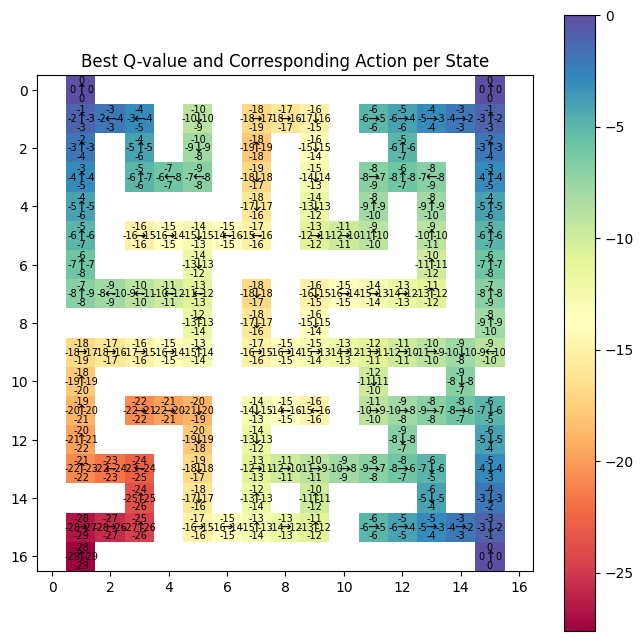

In [48]:
agent.plot_best_action_q_values()

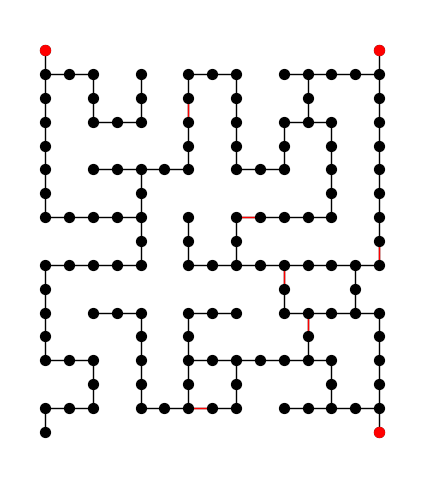

(<Figure size 600x600 with 1 Axes>, <Axes: >)

In [49]:
visualize_graph(G, env, critical_nodes, critical_edges)

In [50]:
from dmt import get_induced_gradient_vector_field, visualize_induced_vector_field

V = get_induced_gradient_vector_field(G)

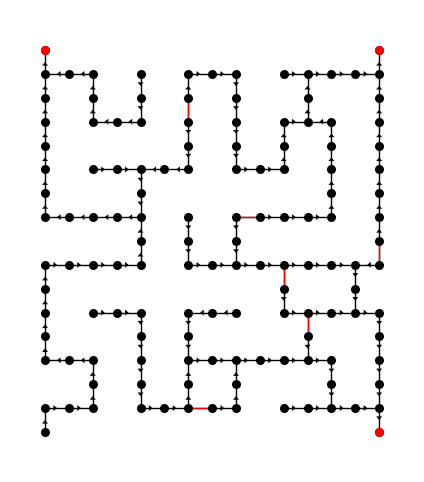

In [51]:
fig, ax = visualize_induced_vector_field(G, env, critical_nodes, critical_edges, V)

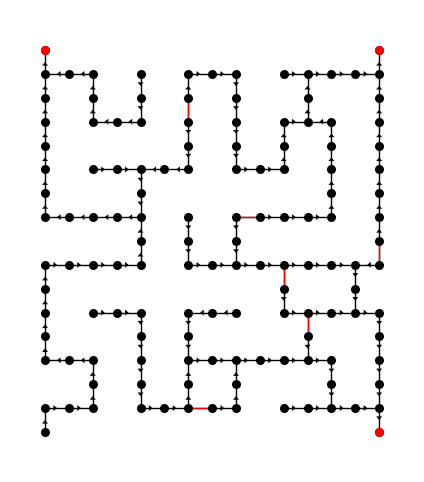

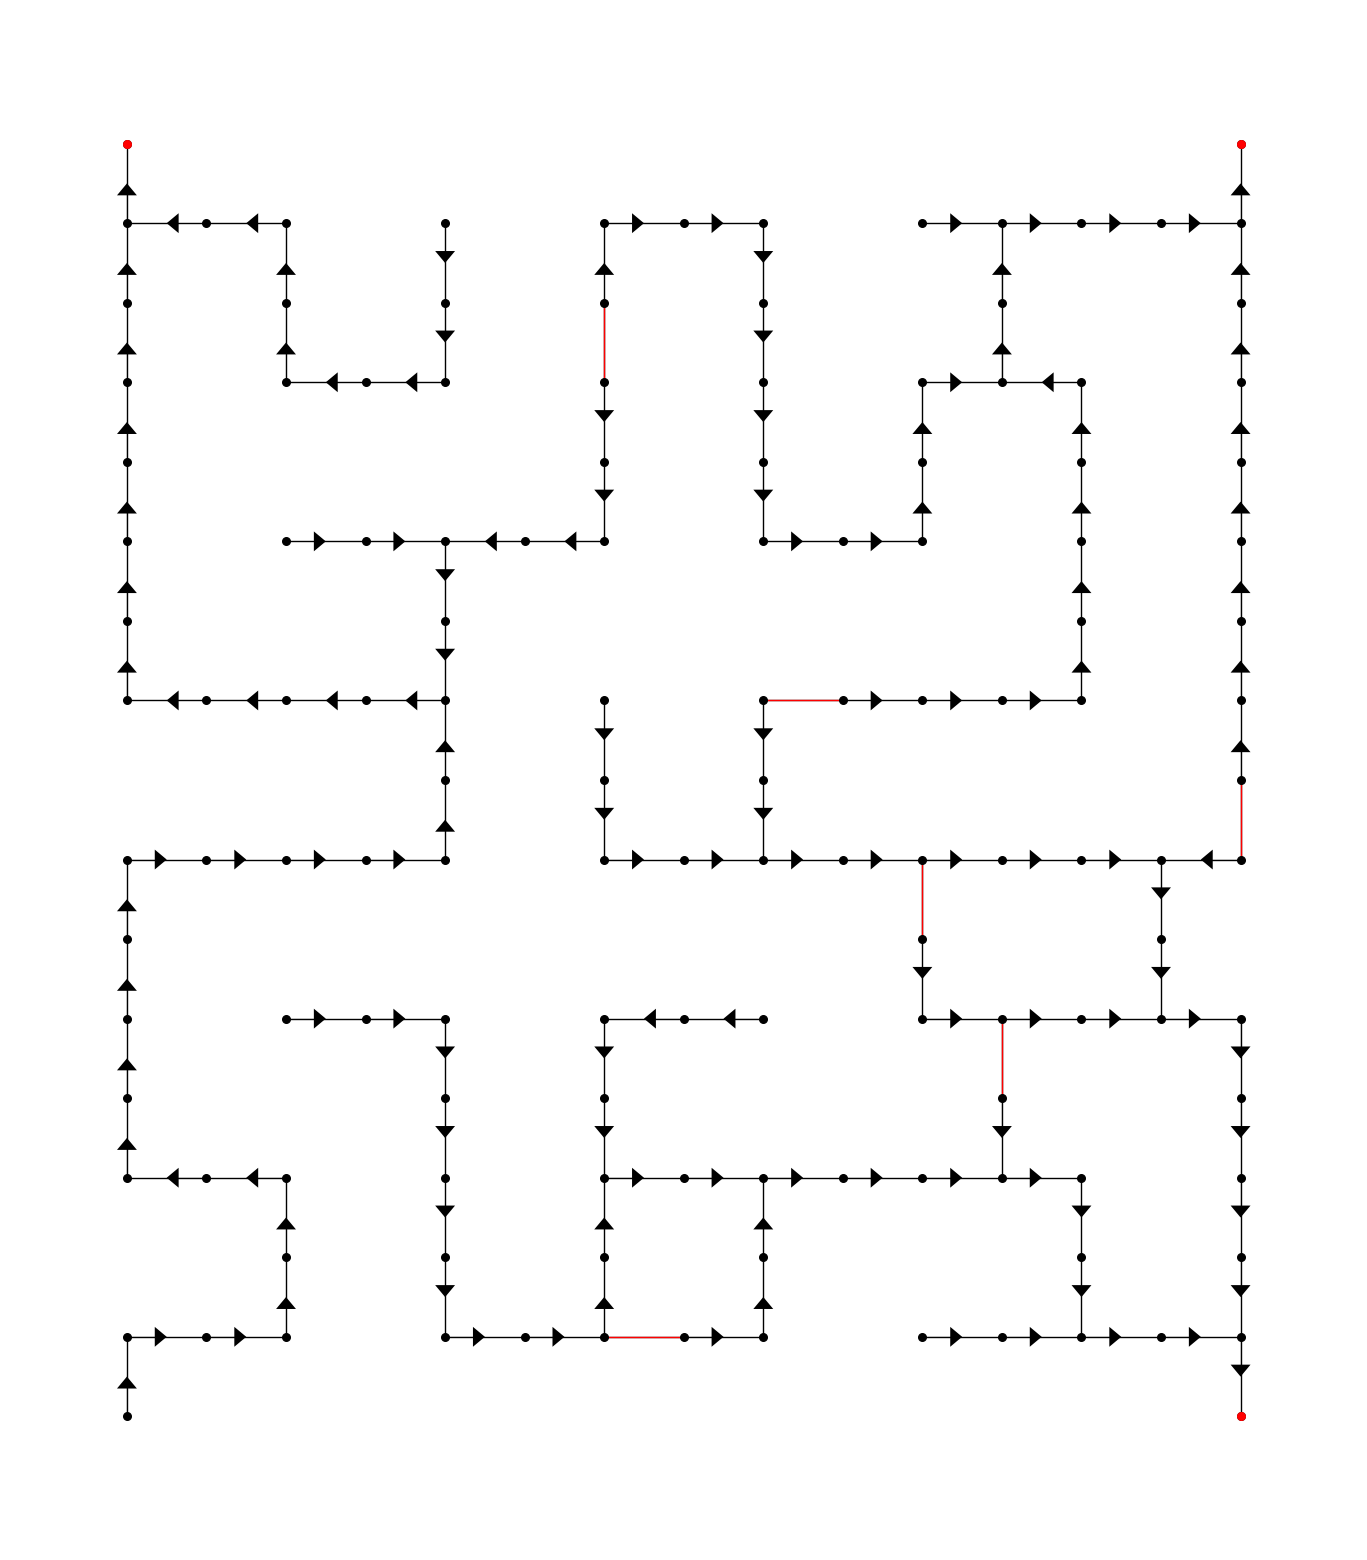

In [52]:
fig, ax = visualize_induced_vector_field(G, env, critical_nodes, critical_edges, V);
fig.set_size_inches(20, 20)
fig


In [53]:
from dmt import boundary_operator_r, betti_numbers

<Axes: >

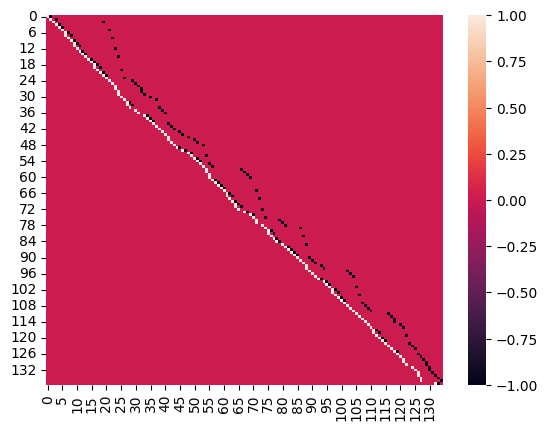

In [54]:
D = boundary_operator_r(G)
sns.heatmap(D)

In [55]:
def betti_numbers(G):
    D = boundary_operator_r(G)
    rank = np.linalg.matrix_rank(D)
    b_0 = D.shape[1] - rank
    b_1 = D.shape[0] - rank
    return b_0, b_1

In [56]:
b0, b1 = betti_numbers(G)

In [57]:
m0 = len(critical_nodes)
m1 = len(critical_edges)
chi = m0 - m1
print(chi)

-3


In [58]:
def euler_characteristic(G):
    V = G.number_of_nodes()
    E = G.number_of_edges()
    return V - E

In [59]:
euler_characteristic(G)

-3

In [60]:
print(b0, b1)

1 4


In [61]:
print(m1)

6
